In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [406]:
data =pd.read_csv("ahds.csv")

In [407]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# SLIDE 3

## Viewing the top 3 numerical and categorical cols with missing values

In [408]:
###Visualizing the missing values in every column
missing = pd.DataFrame(data.isnull().sum(),columns=["Number"])
missing.sort_values(by = "Number", ascending=False, inplace=True)
missing = missing.loc[(missing!=0).any(axis=1)]
missing.reset_index(inplace=True)
missing.rename(columns={"index":"columns"},inplace=True)


In [409]:
missing_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Cond', 'Garage Finish', 'Garage Yr Blt',
       'Garage Qual', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'Mas Vnr Area',
       'Mas Vnr Type', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1',
       'Garage Cars', 'Electrical', 'Total Bsmt SF', 'Bsmt Unf SF',
       'BsmtFin SF 2', 'Garage Area']
types = pd.DataFrame(data[missing_cols].dtypes,columns=["type"])
types.reset_index(inplace=True)
types.rename(columns={"index":"columns"},inplace=True)


In [410]:
missing_df= pd.merge(missing, types, on = "columns")

In [411]:
categorical_vals = missing_df[missing_df["type"]=="object"]
categorical_vals.head(3)
#categorical_vals.head(3).to_csv("categorical_missing_vals.csv")


,columns,Number,type
0,Pool QC,2917,object
1,Misc Feature,2824,object
2,Alley,2732,object


In [412]:
numerical_vals = missing_df[missing_df["type"]=="float64"]
#numerical_vals.head(3).to_csv("numerical_missing_vals.csv")
numerical_vals.head(3)

,columns,Number,type
5,Lot Frontage,490,float64
8,Garage Yr Blt,159,float64
16,Mas Vnr Area,23,float64


## Fixing the missing data in the top 3 columns for both numerical and categorical columns

### categorical fix

In [413]:
## categorical fix
categorical_cols = ['Pool QC', 'Misc Feature', 'Alley']
categorical_data = data[categorical_cols]
#categorical_data.describe().to_csv("cat_miss.csv")
categorical_data.describe()

,Pool QC,Misc Feature,Alley
count,13,106,198
unique,4,5,2
top,Ex,Shed,Grvl
freq,4,95,120


In [414]:
for col in categorical_data.columns:
    print(col, categorical_data[col].unique())

Pool QC [nan 'Ex' 'Gd' 'TA' 'Fa']
Misc Feature [nan 'Gar2' 'Shed' 'Othr' 'Elev' 'TenC']
Alley [nan 'Pave' 'Grvl']


In [415]:
for col in categorical_data.columns:
    print(col, categorical_data[col].mode())

Pool QC 0    Ex
1    Gd
Name: Pool QC, dtype: object
Misc Feature 0    Shed
Name: Misc Feature, dtype: object
Alley 0    Grvl
Name: Alley, dtype: object


In [416]:
clean_data = pd.DataFrame()
for col in categorical_data.columns:
    print(col)
    # categorical_data[col].fillna(categorical_data[col].mode()[0])

Pool QC
Misc Feature
Alley


In [417]:
categorical_data["Pool QC"].fillna(categorical_data["Pool QC"].mode()[0],inplace=True)

categorical_data["Misc Feature"].fillna(categorical_data["Misc Feature"].mode()[0],inplace=True)

categorical_data["Alley"].fillna(categorical_data["Alley"].mode()[0],inplace=True)


C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_13236\198126263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["Pool QC"].fillna(categorical_data["Pool QC"].mode()[0],inplace=True)
C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_13236\198126263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["Misc Feature"].fillna(categorical_data["Misc Feature"].mode()[0],inplace=True)
C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_13236\198126263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [418]:
#categorical_data.describe().to_csv("cat_miss_fix.csv")
categorical_data.describe()

,Pool QC,Misc Feature,Alley
count,2930,2930,2930
unique,4,5,2
top,Ex,Shed,Grvl
freq,2921,2919,2852


### Numerical fix

In [419]:
numerical_vals["columns"].unique()
numeric_cols = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']
numeric_df = data[numeric_cols]

In [420]:
#numeric_df.describe().to_csv("num_missing.csv")
numeric_df.describe()

,Lot Frontage,Garage Yr Blt,Mas Vnr Area
count,2440.000000,2771.000000,2907.000000
mean,69.224590,1978.132443,101.896801
std,23.365335,25.528411,179.112611
min,21.000000,1895.000000,0.000000
25%,58.000000,1960.000000,0.000000
50%,68.000000,1979.000000,0.000000
75%,80.000000,2002.000000,164.000000
max,313.000000,2207.000000,1600.000000


In [421]:
numeric_df.isnull().sum()

Lot Frontage     490
Garage Yr Blt    159
Mas Vnr Area      23
dtype: int64

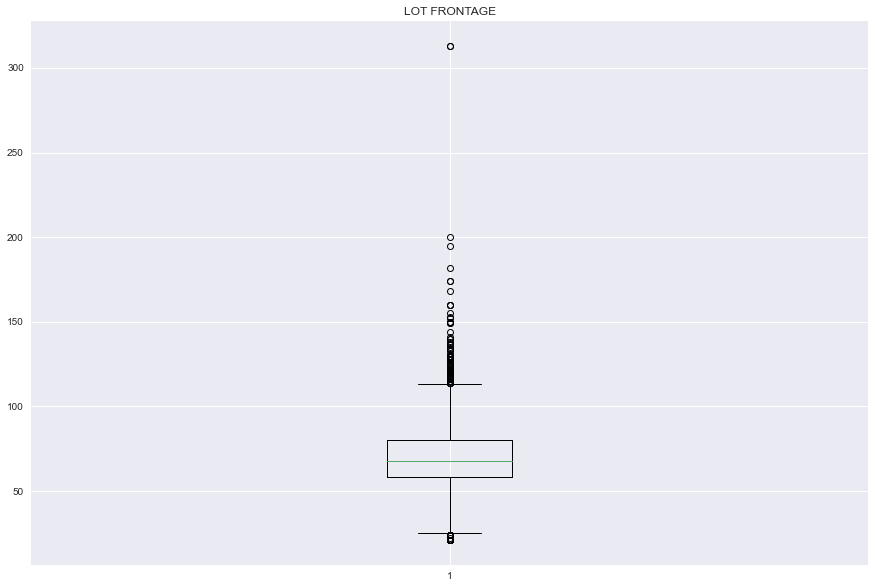

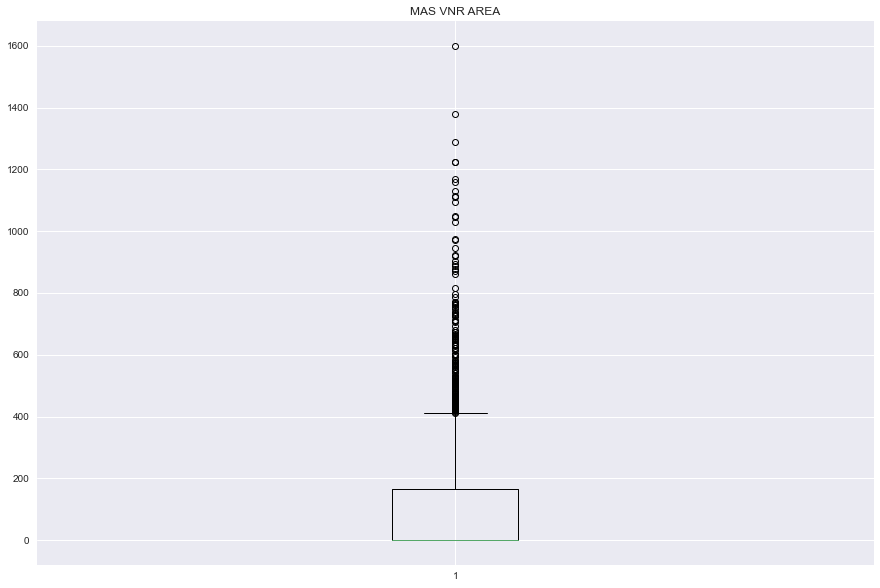

In [422]:
# Checking for outliers in columns 'Lot Frontage' and, 'Mas Vnr Area'
for column in numeric_df[['Lot Frontage','Mas Vnr Area']]:
    plt.figure(figsize=(15,10))
    plt.boxplot(numeric_df[column].dropna())
    plt.title(column.upper())
    plt.show()

In [423]:
## filling in the missing values in the 2 cols using the median
numeric_df["Lot Frontage"].fillna(numeric_df["Lot Frontage"].median(),inplace=True)

numeric_df["Mas Vnr Area"].fillna(numeric_df["Mas Vnr Area"].median(),inplace=True)



C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_13236\3909240523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df["Lot Frontage"].fillna(numeric_df["Lot Frontage"].median(),inplace=True)
C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_13236\3909240523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df["Mas Vnr Area"].fillna(numeric_df["Mas Vnr Area"].median(),inplace=True)


In [424]:
numeric_df.isnull().sum()

Lot Frontage       0
Garage Yr Blt    159
Mas Vnr Area       0
dtype: int64

In [425]:
## Garage yr blt will be filled with the modal year, since the column is a numeric datetime feature
numeric_df["Garage Yr Blt"].fillna(numeric_df["Garage Yr Blt"].mode()[0],inplace=True)

C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_13236\3830971228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df["Garage Yr Blt"].fillna(numeric_df["Garage Yr Blt"].mode()[0],inplace=True)


In [426]:
numeric_df.isnull().sum()

Lot Frontage     0
Garage Yr Blt    0
Mas Vnr Area     0
dtype: int64

In [427]:
#numeric_df.describe().to_csv("num_miss_fix.csv")
numeric_df.describe()

,Lot Frontage,Garage Yr Blt,Mas Vnr Area
count,2930.000000,2930.000000,2930.000000
mean,69.019795,1979.590444,101.096928
std,21.326422,25.561342,178.634545
min,21.000000,1895.000000,0.000000
25%,60.000000,1962.000000,0.000000
50%,68.000000,1983.500000,0.000000
75%,78.000000,2003.000000,162.750000
max,313.000000,2207.000000,1600.000000


# SLIDE 2

In [428]:
data.shape

(2930, 82)

In [429]:
data_types = pd.DataFrame(data.dtypes, columns=["type"])
data_types.reset_index(inplace=True)
data_types.rename(columns = {"index":"Col_names"},inplace=True)
categorical = data_types[data_types["type"]=="object"]
numerical =data_types[(data_types["type"]=="float64")|(data_types["type"]=="int64")]
print(categorical.shape[0],numerical.shape[0])



43 39


In [430]:
numerical_data = data.select_dtypes(include=["float64","int64"])

In [431]:
numerical_data.shape

(2930, 39)

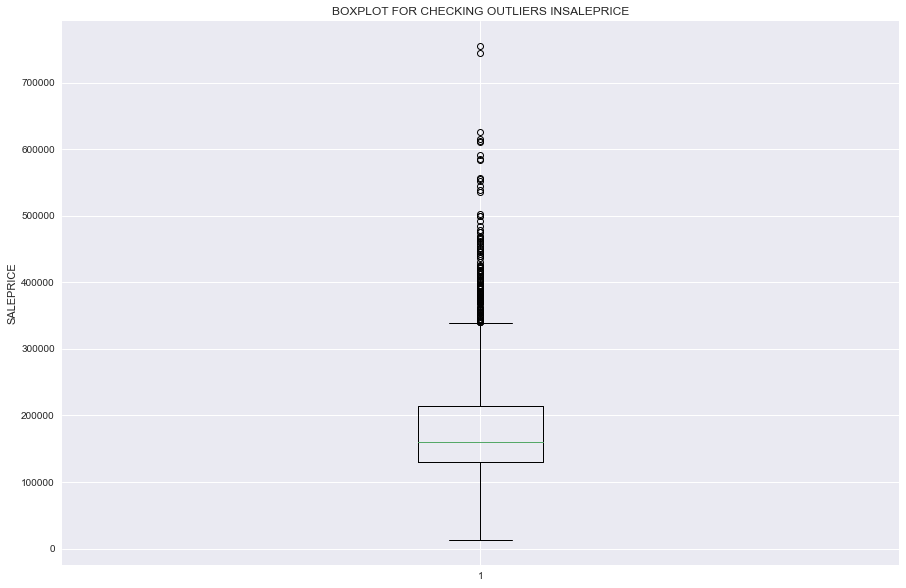

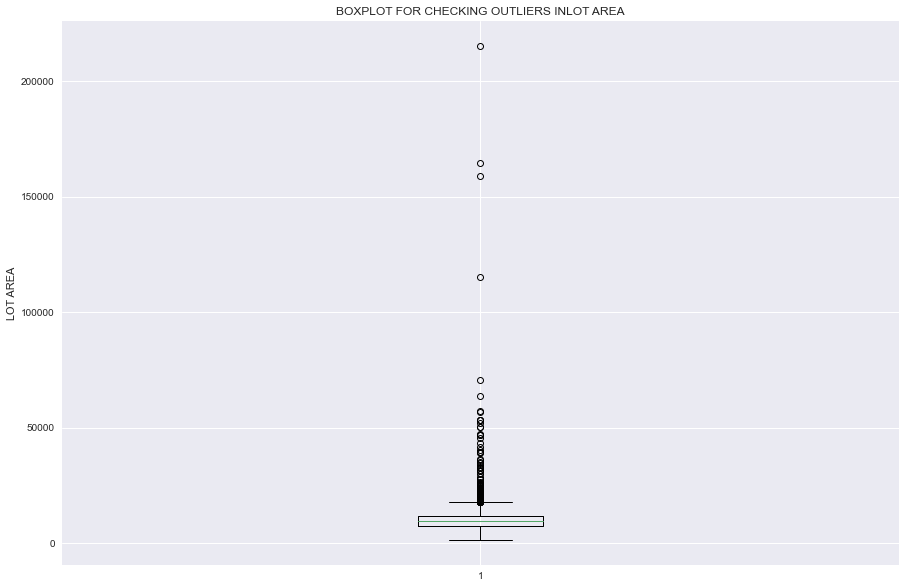

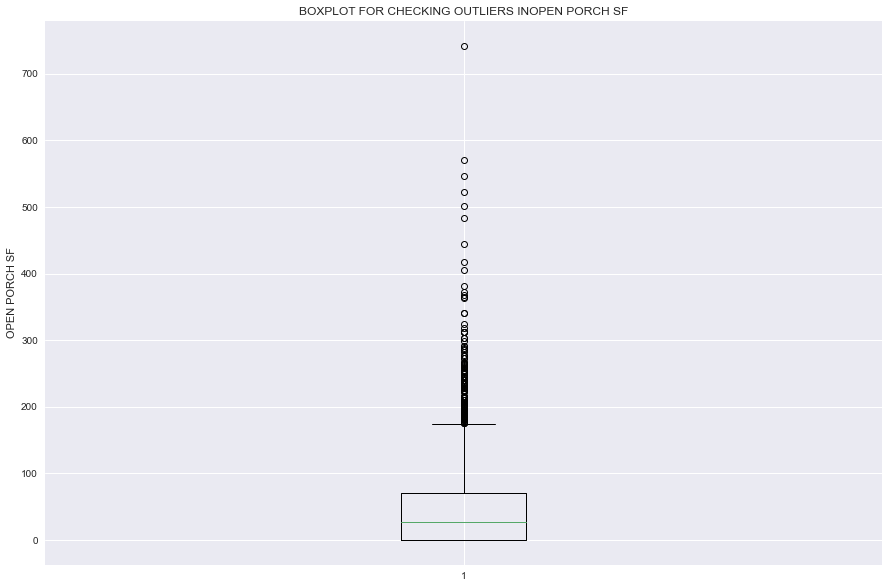

In [432]:
# Replacing outliers using percentile imputation
plt.style.use("seaborn")
for column in numerical_data[['SalePrice','Lot Area','Open Porch SF']]:
    plt.figure(figsize=(15,10))
    plt.boxplot(numerical_data[column])
    plt.title("BOXPLOT FOR CHECKING OUTLIERS IN"+column.upper())
    plt.savefig(column+"boxplot_outlier.png")
    plt.ylabel(column.upper())
    plt.show()

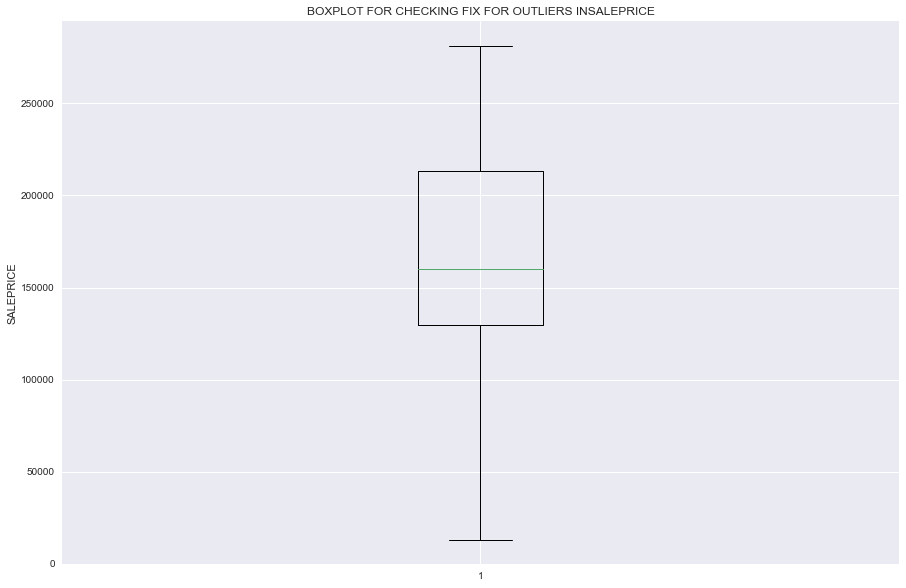

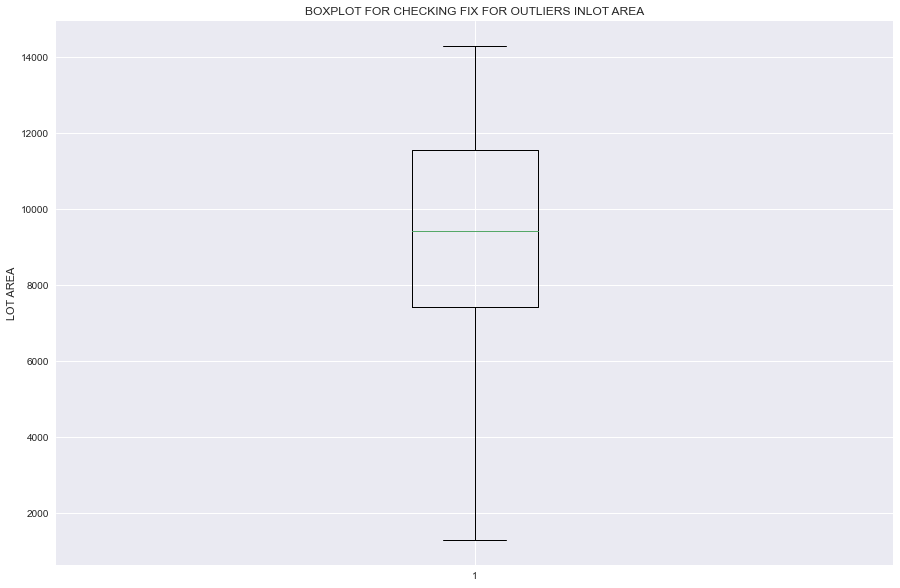

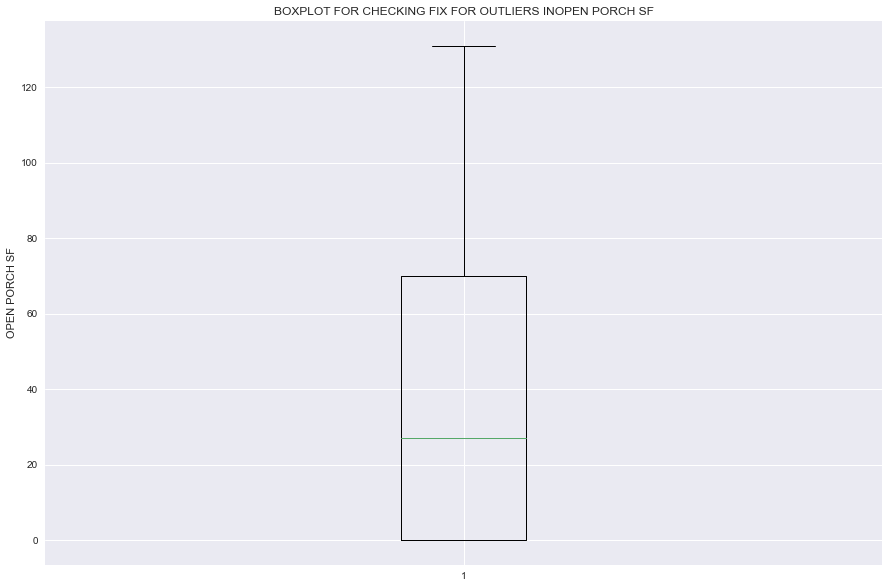

In [433]:
# Replacing outliers using percentile imputation
plt.style.use("seaborn")
for column in numerical_data[['SalePrice','Lot Area','Open Porch SF']]:
    # Computing  90th percentiles and replacing the outliers
    ninetieth_percentile = np.percentile(numerical_data[column], 90)
    b = numerical_data[column]
    b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    plt.figure(figsize=(15,10))
    plt.boxplot(b)
    plt.title("BOXPLOT FOR CHECKING FIX FOR OUTLIERS IN"+column.upper())
    plt.savefig(column+"boxplot_outlier_fix.png")
    plt.ylabel(column.upper())
    plt.show()

In [434]:
len(data["PID"].unique())

2930

In [435]:
len(data["Order"].unique())

2930

# SLIDE 4

## Skewed features (top 2)

In [436]:
numeric_df2 = numerical_data.iloc[:,2:]

In [437]:
skew_dict = {"column":[],"skew_val":[]}
for col in numeric_df2.columns:
    if ((col != 'Year Built')&(col!='Year Remod/Add')&(col!='Yr Sold')):
        skew_dict["column"].append(col)
        skew_dict["skew_val"].append(skew(numeric_df2[col].dropna()))
skew_df = pd.DataFrame(skew_dict)

In [438]:
skew_df.sort_values(by="skew_val", ascending =False,inplace=True)
skew_df

,column,skew_val
31,Misc Val,21.988523
30,Pool Area,16.930469
2,Lot Area,12.814334
12,Low Qual Fin SF,12.111957
28,3Ssn Porch,11.397956
19,Kitchen AbvGr,4.311616
7,BsmtFin SF 2,4.137858
27,Enclosed Porch,4.012390
29,Screen Porch,3.955441
15,Bsmt Half Bath,3.938776


c:\Apps\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


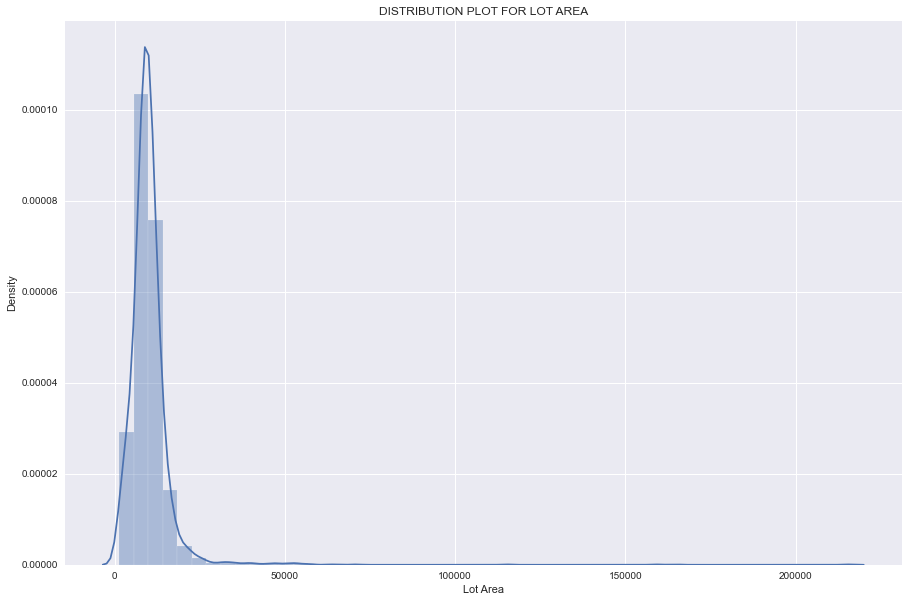

c:\Apps\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


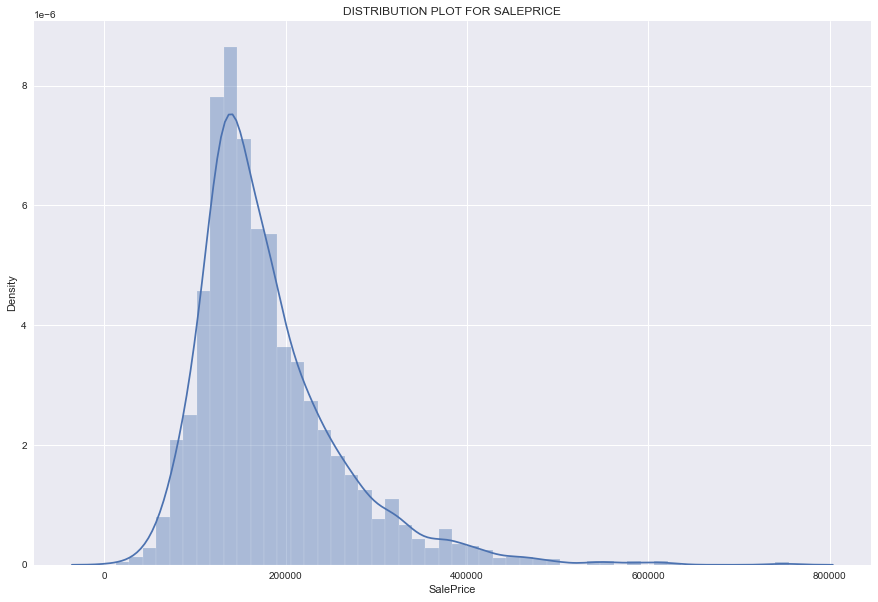

In [439]:
for col in numeric_df2[["Lot Area", "SalePrice"]]:
        plt.figure(figsize=(15,10))
        sns.distplot(numeric_df2[col])
        plt.title("DISTRIBUTION PLOT FOR "+col.upper())
        plt.savefig(col+"skewed.png")
        plt.show()

# fixing the skewness of the data

### log transformation

In [440]:
count=0
for col in numeric_df2[["Lot Area", "SalePrice"]].columns:
    count+=1
    globals()["diction"+str(count)]={col:list(np.log(numeric_df2[col]))}

In [441]:
logged_df=pd.DataFrame(diction1)
df2= pd.DataFrame(diction2)
logged_df["SalePrice"]= df2[["SalePrice"]]

In [442]:
logged_df

,Lot Area,SalePrice
0,10.366278,12.278393
1,9.360655,11.561716
2,9.565704,12.055250
3,9.320091,12.404924
4,9.534595,12.154253
...,...,...
2925,8.979291,11.867097
2926,9.092120,11.782953
2927,9.253496,11.790557
2928,9.211340,12.043554


c:\Apps\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


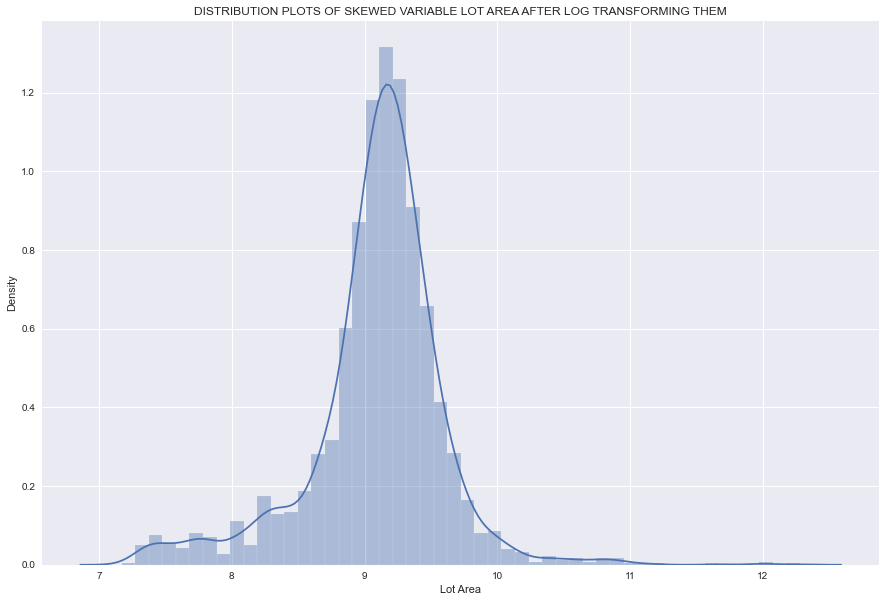

c:\Apps\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


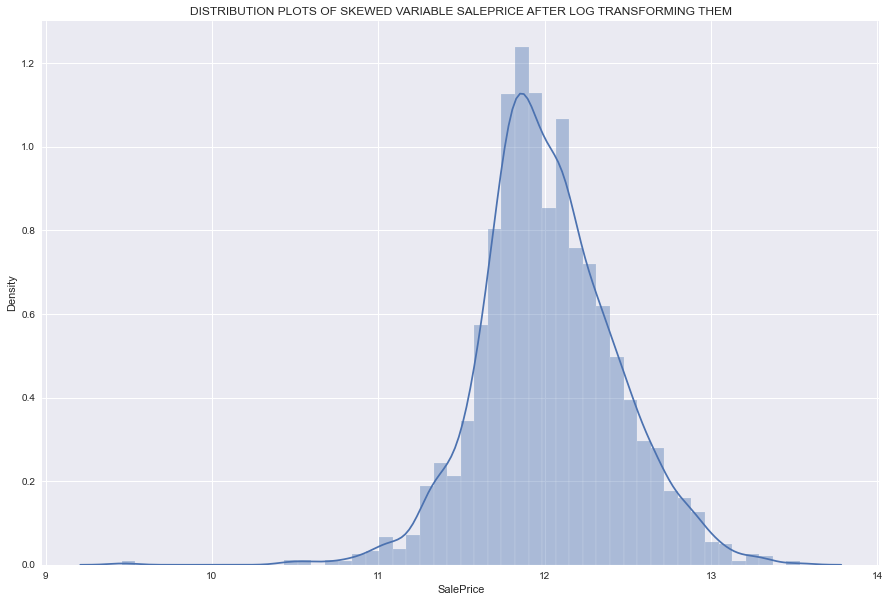

In [443]:
for col in logged_df:
    plt.figure(figsize=(15,10))
    sns.distplot(logged_df[col].dropna())
    plt.title("DISTRIBUTION PLOTS OF SKEWED VARIABLE "+col.upper()+ " AFTER LOG TRANSFORMING THEM")
    plt.savefig(col+"skewed_fix.png")
    plt.show()

In [444]:
## getting the skewness values for the 2 columns
for col in logged_df.columns:
    print(col, skew(logged_df[col].dropna()))

Lot Area -0.49860556352242397
SalePrice -0.014785864999287262


In [445]:
## showing their original skewness values
skew_df[(skew_df["column"]=="Lot Area")|(skew_df["column"]=="SalePrice")]

,column,skew_val
2,Lot Area,12.814334
33,SalePrice,1.742607


## Min max scaling 

In [446]:
scaler = MinMaxScaler()

count=0
for col in numeric_df2[["Lot Area", "SalePrice"]].columns:
    count+=1
    model = scaler.fit(numeric_df2[[col]])
    output = model.transform(numeric_df2[[col]])
    globals()["diction"+str(count)+"2"]={col:list(output.flatten())}

In [447]:
min_max_df=pd.DataFrame(diction12)
df3= pd.DataFrame(diction22)
min_max_df["SalePrice"]= df3[["SalePrice"]]

In [448]:
min_max_df.head()

,Lot Area,SalePrice
0,0.142420,0.272444
1,0.048246,0.124238
2,0.060609,0.214509
3,0.046087,0.311517
4,0.058566,0.238626


c:\Apps\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


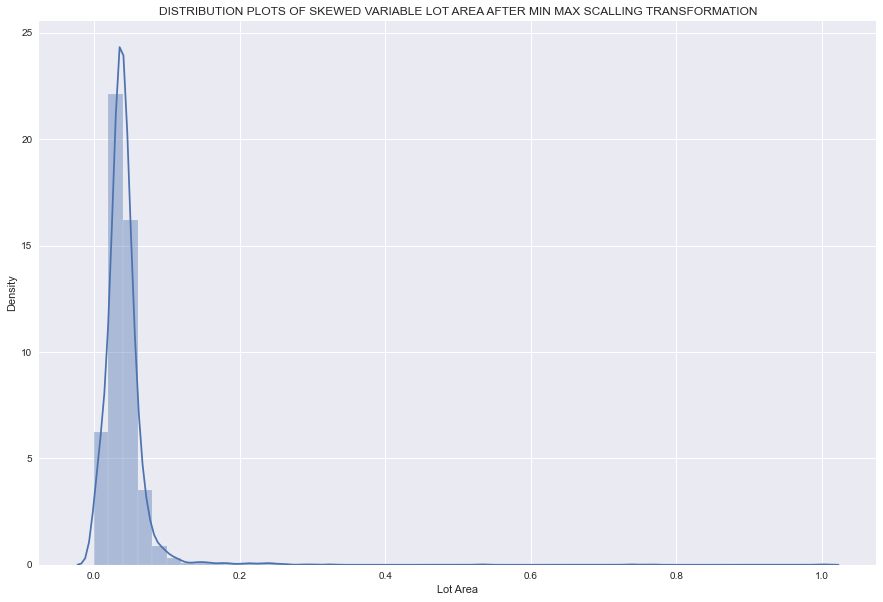

c:\Apps\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


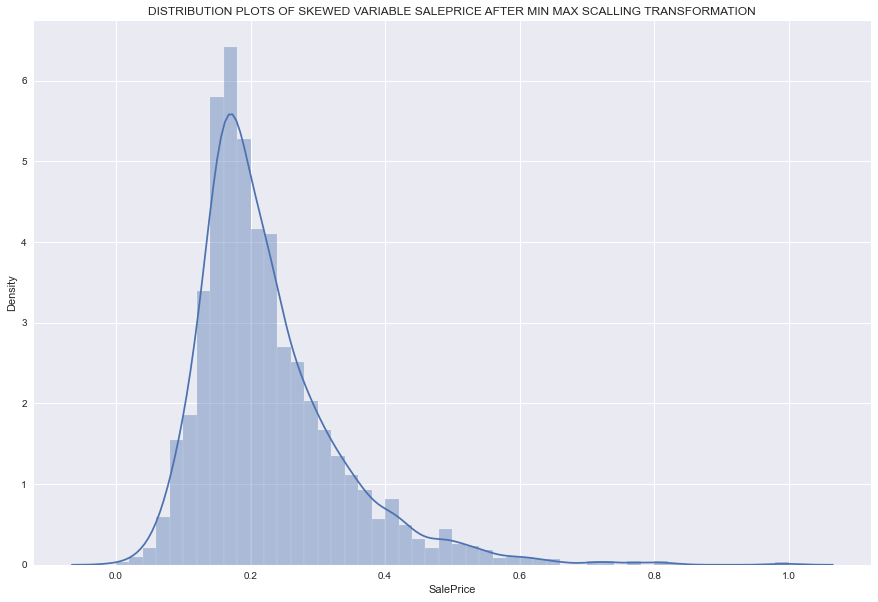

In [449]:
for col in min_max_df:
    plt.figure(figsize=(15,10))
    sns.distplot(min_max_df[col].dropna())
    plt.title("DISTRIBUTION PLOTS OF SKEWED VARIABLE "+col.upper()+ " AFTER MIN MAX SCALLING TRANSFORMATION")
    plt.show()

In [450]:
## getting the skewness values for the 2 columns
for col in min_max_df.columns:
    print(col, skew(min_max_df[col].dropna()))

Lot Area 12.814333637733155
SalePrice 1.7426073719460113


In [451]:
## showing their original skewness values
skew_df[(skew_df["column"]=="Lot Area")|(skew_df["column"]=="SalePrice")]

,column,skew_val
2,Lot Area,12.814334
33,SalePrice,1.742607


## finding high cardinality categorical columns

In [452]:
categorical_data2 = data.select_dtypes(include="object")

In [453]:
cardinality = {"column":[],"number_of_unique_vals":[]}
for col in categorical_data2.columns:
    cardinality["column"].append(col)
    cardinality["number_of_unique_vals"].append(len(list(categorical_data2[col].dropna().unique())))
    #print(col, len(list(categorical_data2[col].dropna().unique())))
cardinality_df=pd.DataFrame(cardinality)

In [454]:
cardinality_df.sort_values(by="number_of_unique_vals",ascending=False,inplace=True)
cardinality_df.head(3)

,column,number_of_unique_vals
8,Neighborhood,28
16,Exterior 2nd,17
15,Exterior 1st,16


In [455]:
for col in categorical_data2[["Neighborhood","Exterior 2nd","Exterior 1st"]].columns:
    print(col, categorical_data2[col].unique())

Neighborhood ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
Exterior 2nd ['Plywood' 'VinylSd' 'Wd Sdng' 'BrkFace' 'CmentBd' 'HdBoard' 'Wd Shng'
 'MetalSd' 'ImStucc' 'Brk Cmn' 'AsbShng' 'Stucco' 'AsphShn' 'CBlock'
 'Stone' 'PreCast' 'Other']
Exterior 1st ['BrkFace' 'VinylSd' 'Wd Sdng' 'CemntBd' 'HdBoard' 'Plywood' 'MetalSd'
 'AsbShng' 'WdShing' 'Stucco' 'AsphShn' 'BrkComm' 'CBlock' 'PreCast'
 'Stone' 'ImStucc']


## one hot encoding

In [456]:
categorical_data2['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

In [457]:
categorical_data2['Garage Type'].dropna().astype('category')

0       Attchd
1       Attchd
2       Attchd
3       Attchd
4       Attchd
         ...  
2924    Detchd
2925    Detchd
2926    Attchd
2928    Attchd
2929    Attchd
Name: Garage Type, Length: 2773, dtype: category
Categories (6, object): ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd']

In [458]:
# Converting type of columns to category
# 
garage_df = categorical_data2[['Garage Type']].dropna()
garage_df['Garage Type']=garage_df['Garage Type'].astype('category')

# #Assigning numerical values and storing it in another columns
garage_df['Garage TypeN']=garage_df['Garage Type'].cat.codes

# #Create an instance of One-hot-encoder
enc=OneHotEncoder()

enc_data=pd.DataFrame(enc.fit_transform(garage_df[['Garage TypeN']]).toarray())
  
#Merge with main
New_df=garage_df.join(enc_data)


In [459]:
#garage_df["Garage TypeN"].describe().to_csv("hot_encoding.csv")
garage_df["Garage TypeN"].describe()

count    2773.000000
mean        2.283087
std         1.790303
min         0.000000
25%         1.000000
50%         1.000000
75%         5.000000
max         5.000000
Name: Garage TypeN, dtype: float64

# SLIDE 5

## Bivariate analysis

In [460]:
analysis =['MS Zoning','Foundation','Garage Type','SalePrice']
analysis_df = data[analysis]

In [461]:
analysis_df.head()

,MS Zoning,Foundation,Garage Type,SalePrice
0,RL,CBlock,Attchd,215000
1,RH,CBlock,Attchd,105000
2,RL,CBlock,Attchd,172000
3,RL,CBlock,Attchd,244000
4,RL,PConc,Attchd,189900


In [462]:
for col in analysis_df[['MS Zoning','Foundation','Garage Type']]:
    globals()[col[0]+"df"]= analysis_df[[col,"SalePrice"]]

### MS ZONING

In [463]:
Mdf["MS Zoning"].unique()

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)

In [464]:
count=0
for val in Mdf["MS Zoning"].unique():
    count+=1
    globals()["data"+str(count)]= Mdf[Mdf["MS Zoning"]==val]
    globals()["data"+str(count)]= globals()["data"+str(count)]["SalePrice"]
    


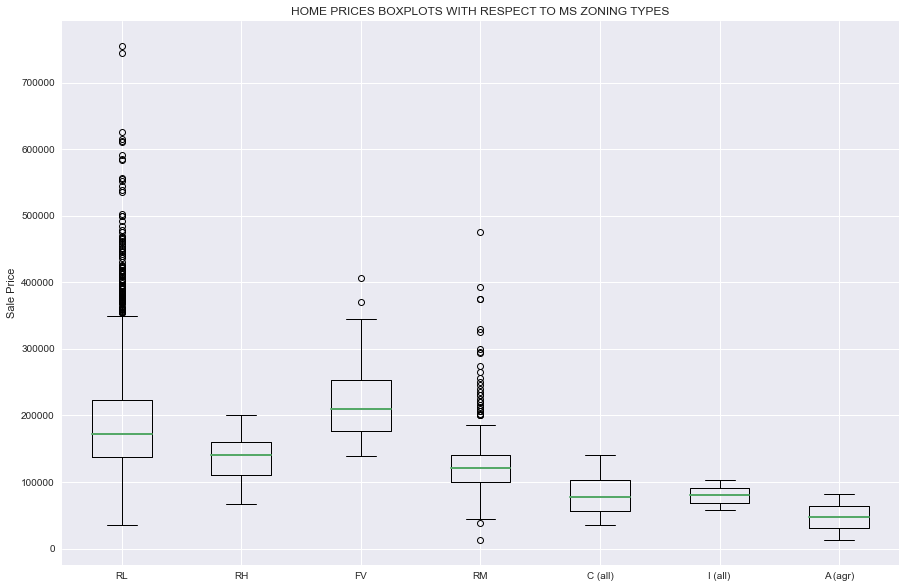

In [465]:
plt.figure(figsize=(15,10))
plt.boxplot([data1,data2,data3,data4,data5,data6,data7],
labels = ['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
medianprops={'linewidth': 2})
plt.title("HOME PRICES BOXPLOTS WITH RESPECT TO MS ZONING TYPES")
plt.ylabel("Sale Price")
plt.savefig("MSzoning.png")
plt.show()


### FOUNDATION TYPE

In [466]:
Fdf["Foundation"].unique()

array(['CBlock', 'PConc', 'Wood', 'BrkTil', 'Slab', 'Stone'], dtype=object)

In [467]:
count=0
for val in Fdf["Foundation"].unique():
    count+=1
    globals()["data"+str(count)]= Fdf[Fdf["Foundation"]==val]
    globals()["data"+str(count)]= globals()["data"+str(count)]["SalePrice"]

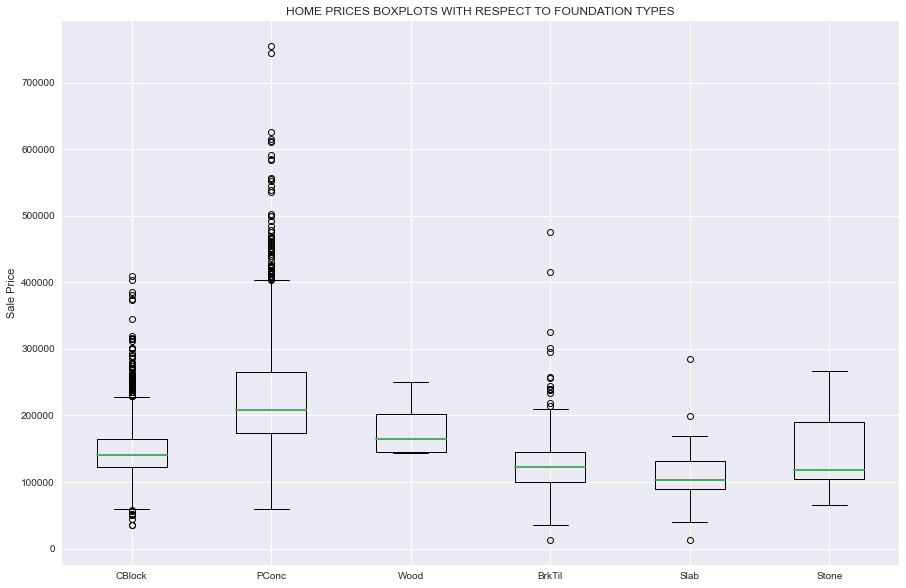

In [468]:
plt.figure(figsize=(15,10))
plt.boxplot([data1,data2,data3,data4,data5,data6],
labels = ['CBlock', 'PConc', 'Wood', 'BrkTil', 'Slab', 'Stone'],
medianprops={'linewidth': 2})
plt.title("HOME PRICES BOXPLOTS WITH RESPECT TO FOUNDATION TYPES")
plt.ylabel("Sale Price")
plt.savefig("Foundation.png")
plt.show()


## GARAGE TYPE

In [469]:
Gdf["Garage Type"].fillna(Gdf["Garage Type"].mode()[0],inplace=True)


C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_13236\2719431945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gdf["Garage Type"].fillna(Gdf["Garage Type"].mode()[0],inplace=True)


In [470]:
Gdf["Garage Type"].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', 'CarPort', '2Types'],
      dtype=object)

In [471]:
count=0
for val in Gdf["Garage Type"].unique():
    count+=1
    globals()["data"+str(count)]= Gdf[Gdf["Garage Type"]==val]
    globals()["data"+str(count)]= globals()["data"+str(count)]["SalePrice"]

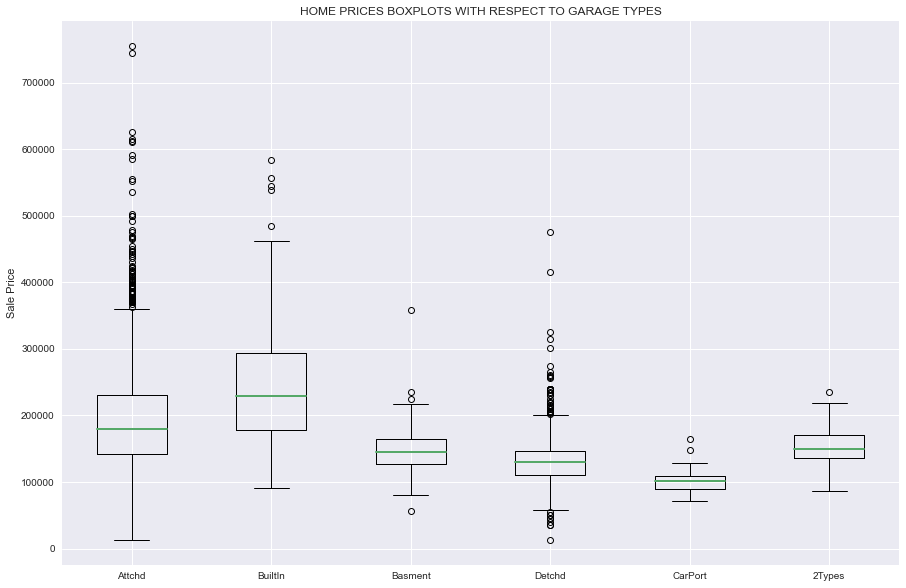

In [472]:
plt.figure(figsize=(15,10))
plt.boxplot([data1,data2,data3,data4,data5,data6],
labels = ['Attchd', 'BuiltIn', 'Basment', 'Detchd', 'CarPort', '2Types'],
medianprops={'linewidth': 2})
plt.title("HOME PRICES BOXPLOTS WITH RESPECT TO GARAGE TYPES")
plt.ylabel("Sale Price")
plt.savefig("Garage.png")
plt.show()


# SLIDE 6

In [473]:
# Perform PCA (w/o limits on n_components)
PCA_data = numerical_data.iloc[:,2:-1].dropna()
pca = PCA()
_ = pca.fit_transform(numerical_data.iloc[:,2:-1].dropna())
PC_components = np.arange(pca.n_components_) + 1

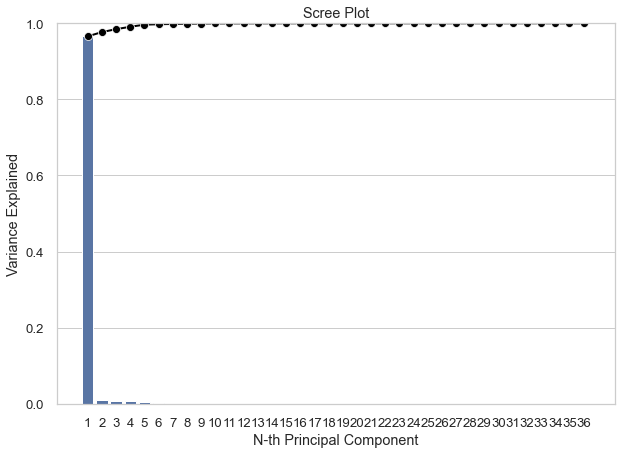

In [474]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

##CONCLUSION
### We used 2 pricinciple components since they explain approximately 99% of the variation in the data.

In [475]:
PCA_data.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [476]:
cols = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']

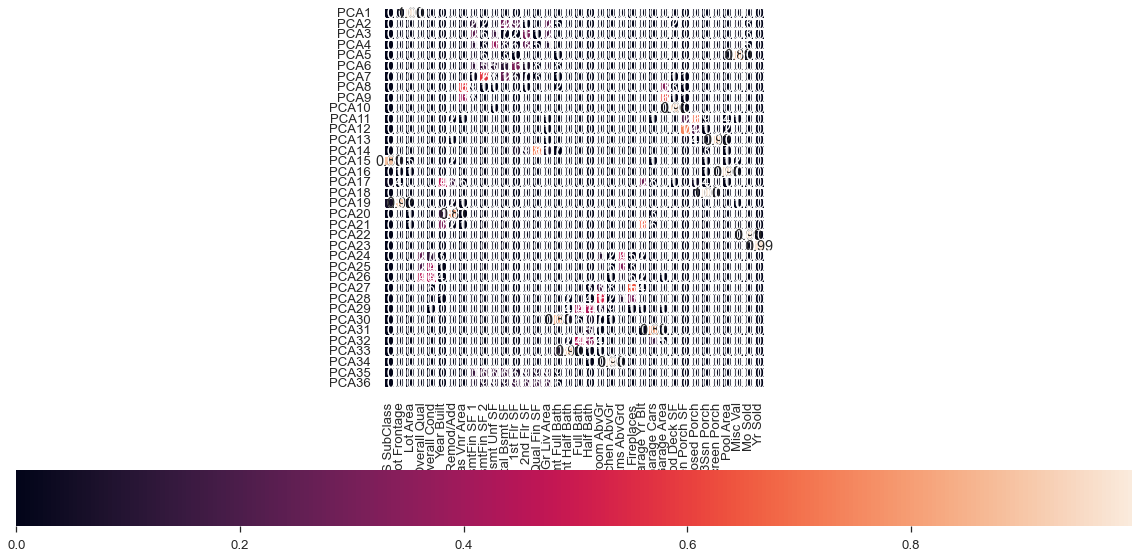

In [477]:
# Feature Weight
plt.figure(figsize=(20,10))
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(cols),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

## The map shows the composition of each principle component as shown  in the scree plot above.

In [478]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(PCA_data[cols])

In [479]:
# Convert back to DataFrame for readability
data_pca = pd.DataFrame(data=pca_array)
data_pca.columns = ['PC' + str(col+1) for col in data_pca.columns.values]
data_pca["SalePrice"]= numerical_data.iloc[:,2:,].dropna()["SalePrice"]

In [480]:
data_pca.columns

Index(['PC1', 'PC2', 'SalePrice'], dtype='object')

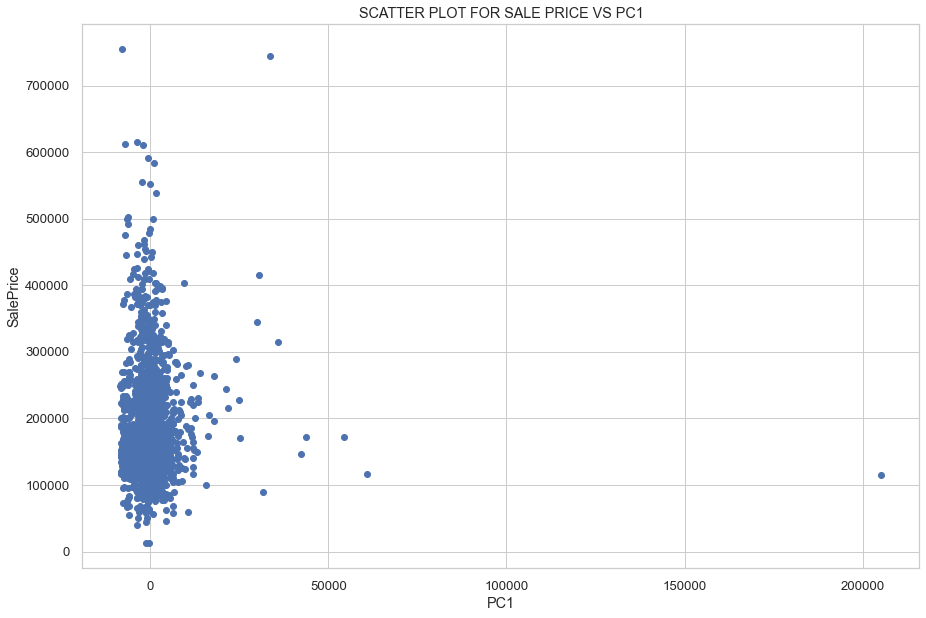

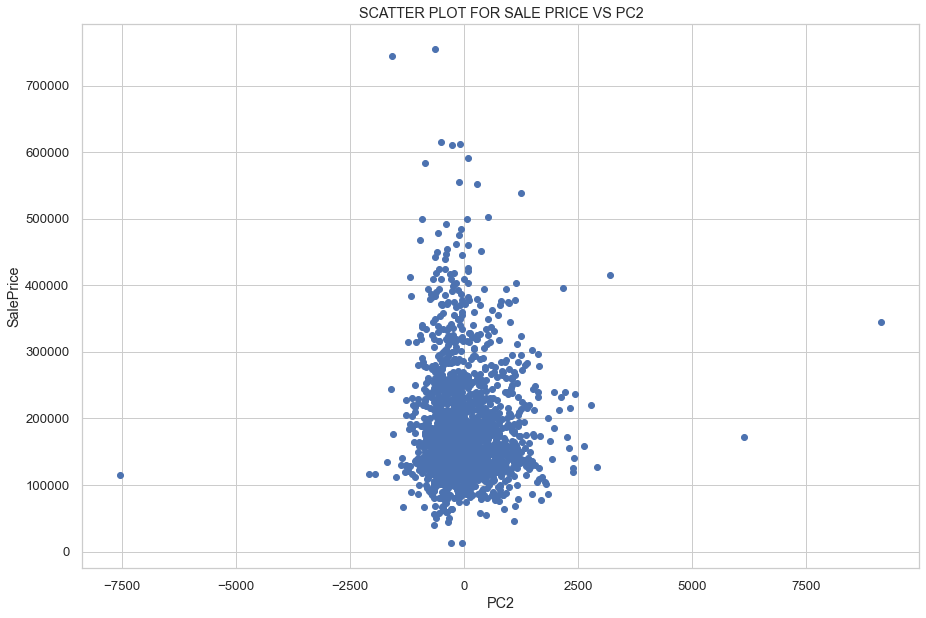

In [481]:
for col in data_pca[['PC1', 'PC2']]:
    plt.figure(figsize=(15,10))
    plt.scatter(data_pca[col],data_pca["SalePrice"])
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.title("SCATTER PLOT FOR SALE PRICE VS "+col)
    plt.savefig(col+"pca_salep.png")
    plt.show()

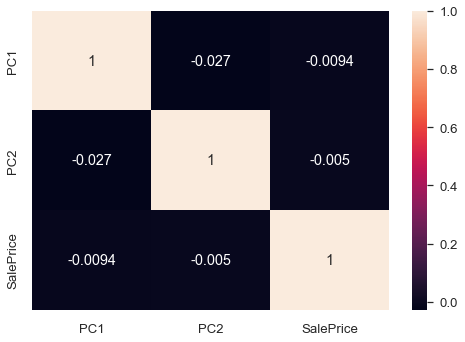

In [482]:
pca_corr = data_pca.dropna().corr()
mask = np.triu(np.ones_like(pca_corr, dtype=bool))
sns.heatmap(pca_corr,annot=True)
plt.savefig("pca_corr_map.png")